# Bayescan

In [1]:
source("../../../General_Methods/BayeScan2.1/R functions/plot_R.r")

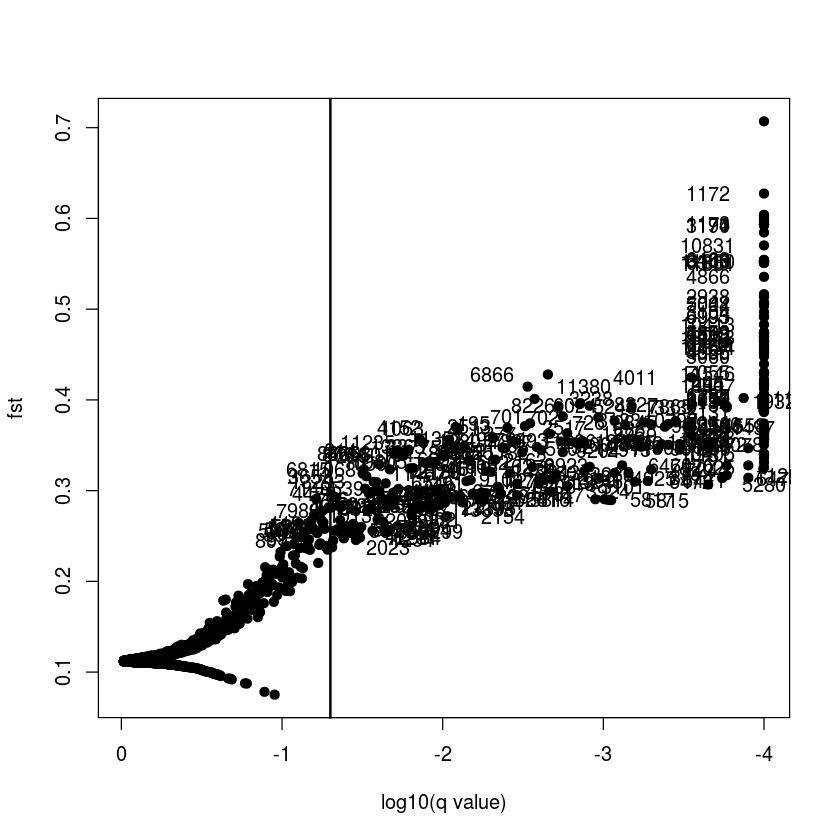

In [2]:
BS<- plot_bayescan("OL-t10x45m75-maf025-filt-BS-po100c_fst.txt",FDR=0.05)

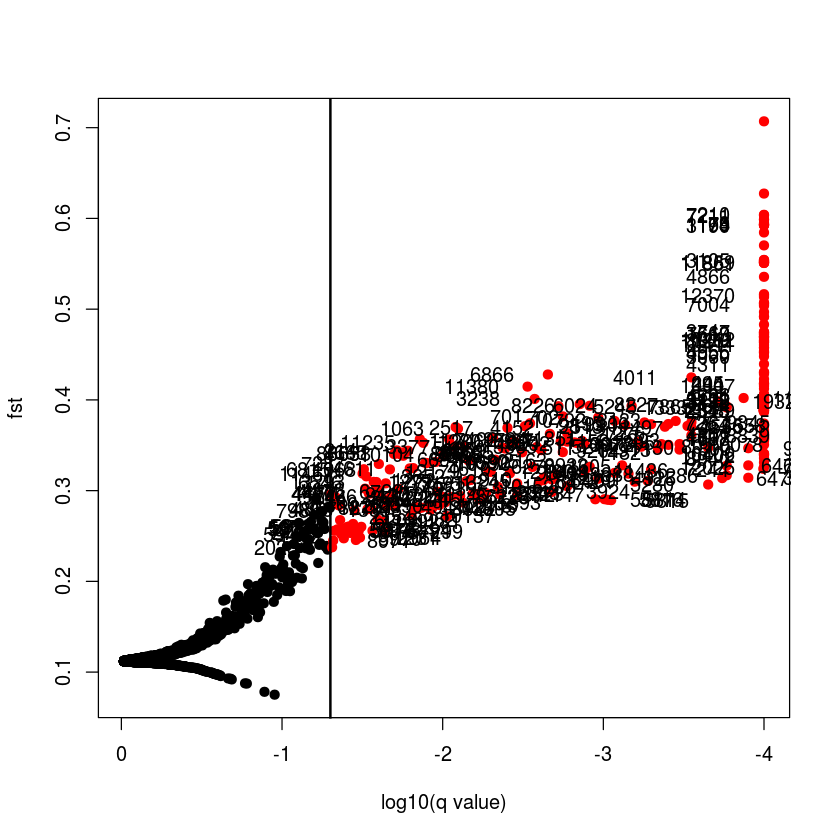

In [3]:
BS<- plot_bayescan("OL-t10x45m75-maf025-filt-BS-po100c_fst.txt",highlight = BS$outliers,FDR=0.05)

In [4]:
BS$nb_outliers

[1] 296

In [5]:
snpsA <- read.table("../Inputs/OL-c85t10-x45m75-maf025-filt-BS_markers_dictionary.tsv", header=TRUE)

In [6]:
outs_BS <- as.character(snpsA[match(BS$outliers,snpsA[,2]),1])

In [7]:
head(outs_BS)

[1] "locus_101035__84__84" "locus_102746__34__34" "locus_102746__37__37"
[4] "locus_102746__57__57" "locus_104611__53__53" "locus_104742__3__3"

In [8]:
loci_BS <- unique(unlist(strsplit(as.character(outs_BS),"_"))[seq(2,length(outs_BS)*6,6)])
write.table(loci_BS,file = "BSLoci_x45m75maf025_filt_100.txt",quote = F,row.names = F, col.names = F)

In [9]:
length(loci_BS)

[1] 195

# OutFlank
Requires OutFLANK and dependencies. Installation instructions an be found [here](https://github.com/whitlock/OutFLANK/blob/master/OutFLANK%20readme.pdf). Will filter based on He, so does not really matter what maf you give it.

In [10]:
library(OutFLANK)

Loading required package: qvalue


Read in data saved from adegenet object for maf > 2.5%. Format for MakeDiploidFSTMat for OutFLANK.

## x45m75-maf025-All

In [11]:
tab <- read.table("../Inputs/OL-c85t10-x45m75-maf025-filt.tab",header = TRUE,row.names = 1,na.strings = "NA")
snp <- tab[,seq(1,ncol(tab)-1,2)]
snp[is.na(snp)] <- 9 

regions <- read.table("../Inputs/OL-c85t10-x45m75.reg",header = F)
pops <- read.table("../Inputs/OL-c85t10-x45m75.pop",header = F)

Making input matrix for OutFLANK.

### Population

In [12]:
pop.mat <- MakeDiploidFSTMat(snp,colnames(snp),pops)

Calculating FSTs, may take a few minutes...
[1] "10000 done of 13444"


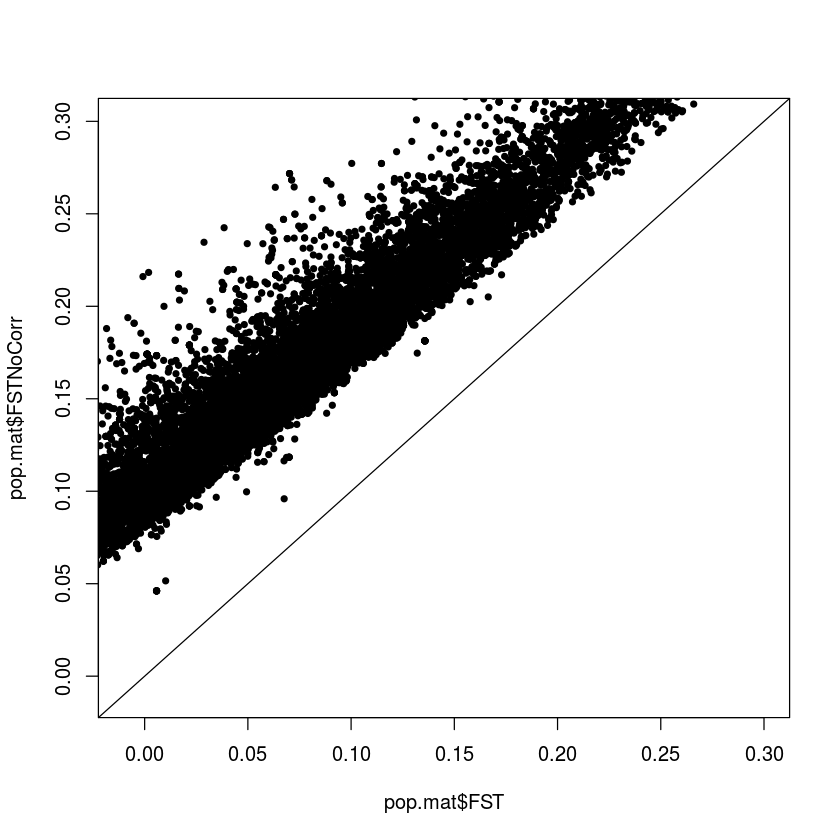

In [13]:
plot(pop.mat$FST, pop.mat$FSTNoCorr, xlim = c(-0.01,0.3), 
     ylim = c(-0.01, 0.3), pch = 20)
abline(0, 1)

### Running OUTFlank

In [14]:
pop.output <- OutFLANK(pop.mat,LeftTrimFraction=0.05,RightTrimFraction=0.05,Hmin=0.1,NumberOfSamples = nrow(unique(pops)) ,qthreshold=0.1)

### Plotting neutral dist

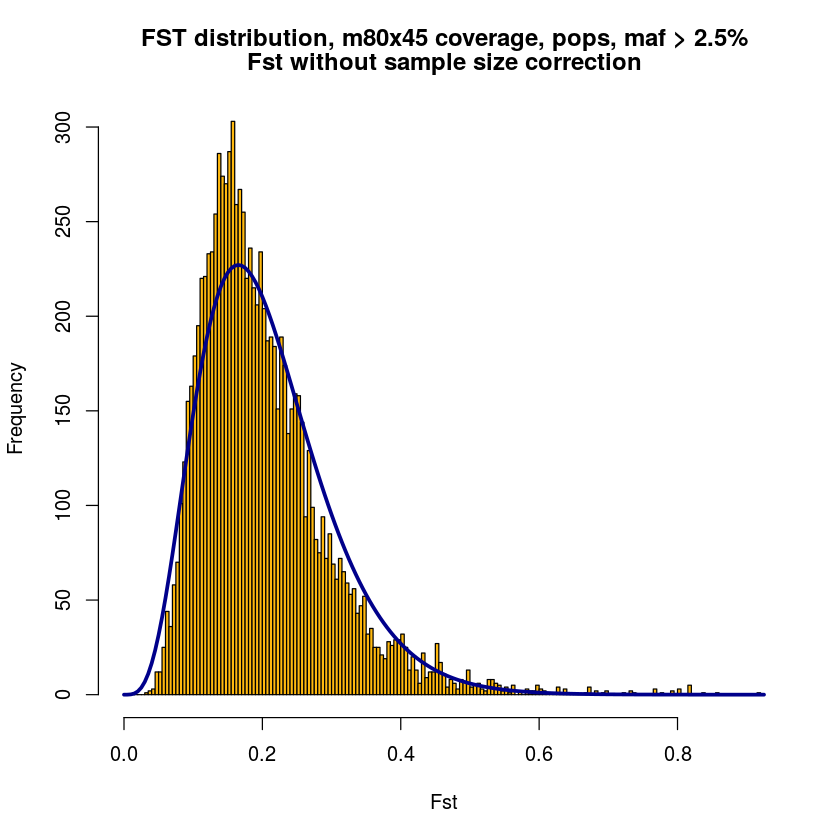

In [15]:
OutFLANKResultsPlotter(pop.output, withOutliers = TRUE,
NoCorr = TRUE, Hmin = 0.1, binwidth = 0.005, Zoom =
FALSE, RightZoomFraction = 0.05, titletext = "FST distribution, m80x45 coverage, pops, maf > 2.5%")

In [16]:
outliers_OF <- gsub('.{2}$', '', pop.output$results$LocusName[pop.output$results$OutlierFlag == TRUE])
print(outliers_OF)

 [1] "locus_121492__16__16" "locus_121492__34__34" "locus_121492__54__54"
 [4] "locus_121492__56__56" "locus_121492__62__62" "locus_121492__88__88"
 [7] "locus_17359__51__51"  "locus_17359__64__64"  "locus_17359__76__76" 
[10] "locus_17359__82__82"  "locus_17888__5__5"    "locus_187013__22__22"
[13] "locus_219420__17__17" "locus_219420__31__31" "locus_219420__33__33"
[16] "locus_270303__31__31" "locus_274413__40__40" "locus_277490__81__81"
[19] "locus_280479__64__64" "locus_285901__69__69" "locus_290471__14__14"
[22] "locus_290471__15__15" "locus_292179__27__27" "locus_292179__67__67"
[25] "locus_333717__71__71" "locus_335279__67__67" "locus_50945__43__43" 
[28] "locus_7299__33__33"   "locus_7299__61__61"   "locus_7299__70__70"  
[31] "locus_7299__83__83"  


In [17]:
length(outliers_OF)

[1] 31

In [18]:
pop.output$results[which(pop.output$results$OutlierFlag == TRUE),]

,LocusName,He,FST,T1,T2,FSTNoCorr,T1NoCorr,T2NoCorr,meanAlleleFreq,indexOrder,GoodH,qvalues,pvalues,pvaluesRightTail,OutlierFlag
1169,locus_121492__16__16.C,0.1863053,0.7922161,0.07732685,0.09760828,0.8170087,0.07975381,0.09761684,0.89603960,1169,goodH,0.02104028,3.846842e-05,1.923421e-05,TRUE
1171,locus_121492__34__34.A,0.1863053,0.7922161,0.07732685,0.09760828,0.8170087,0.07975381,0.09761684,0.10396040,1171,goodH,0.02104028,3.846842e-05,1.923421e-05,TRUE
1172,locus_121492__54__54.A,0.1784139,0.8359864,0.07832728,0.09369444,0.8569115,0.08029379,0.09370138,0.90099010,1172,goodH,0.02104028,1.750807e-05,8.754034e-06,TRUE
1173,locus_121492__56__56.C,0.1863053,0.7922161,0.07732685,0.09760828,0.8170087,0.07975381,0.09761684,0.89603960,1173,goodH,0.02104028,3.846842e-05,1.923421e-05,TRUE
1174,locus_121492__62__62.A,0.1863053,0.7922161,0.07732685,0.09760828,0.8170087,0.07975381,0.09761684,0.89603960,1174,goodH,0.02104028,3.846842e-05,1.923421e-05,TRUE
1175,locus_121492__88__88.A,0.1863053,0.7922161,0.07732685,0.09760828,0.8170087,0.07975381,0.09761684,0.89603960,1175,goodH,0.02104028,3.846842e-05,1.923421e-05,TRUE
3104,locus_17359__51__51.A,0.1543366,0.6960489,0.05610139,0.08059978,0.7386797,0.05955173,0.08061914,0.91573034,3104,goodH,0.04443033,1.758972e-04,8.794860e-05,TRUE
3105,locus_17359__64__64.A,0.1745222,0.7281002,0.06648258,0.09130965,0.7667055,0.07002331,0.09133013,0.09659091,3105,goodH,0.02742113,1.025277e-04,5.126383e-05,TRUE
3106,locus_17359__76__76.A,0.1727686,0.7289481,0.06588429,0.09038268,0.7669586,0.06933463,0.09040204,0.90449438,3106,goodH,0.02742113,1.020268e-04,5.101338e-05,TRUE
3107,locus_17359__82__82.A,0.1727686,0.7289481,0.06588429,0.09038268,0.7669586,0.06933463,0.09040204,0.90449438,3107,goodH,0.02742113,1.020268e-04,5.101338e-05,TRUE


In [19]:
write.table(outliers_OF,file = "x45m75maf025filt-outflank.snp", quote = F,row.names = F,col.names = F)

In [20]:
loci_OF <- unique(unlist(strsplit(as.character(outliers_OF),"_"))[seq(2,length(outliers_OF)*6,6)])
length(loci_OF)

[1] 16

In [21]:
write.table(loci_OF,file = "x45m75maf025filt-outflank.loci", quote = F,row.names = F,col.names = F)

### Regions

In [22]:
reg.mat <- MakeDiploidFSTMat(snp,colnames(snp),regions)

Calculating FSTs, may take a few minutes...
[1] "10000 done of 13444"


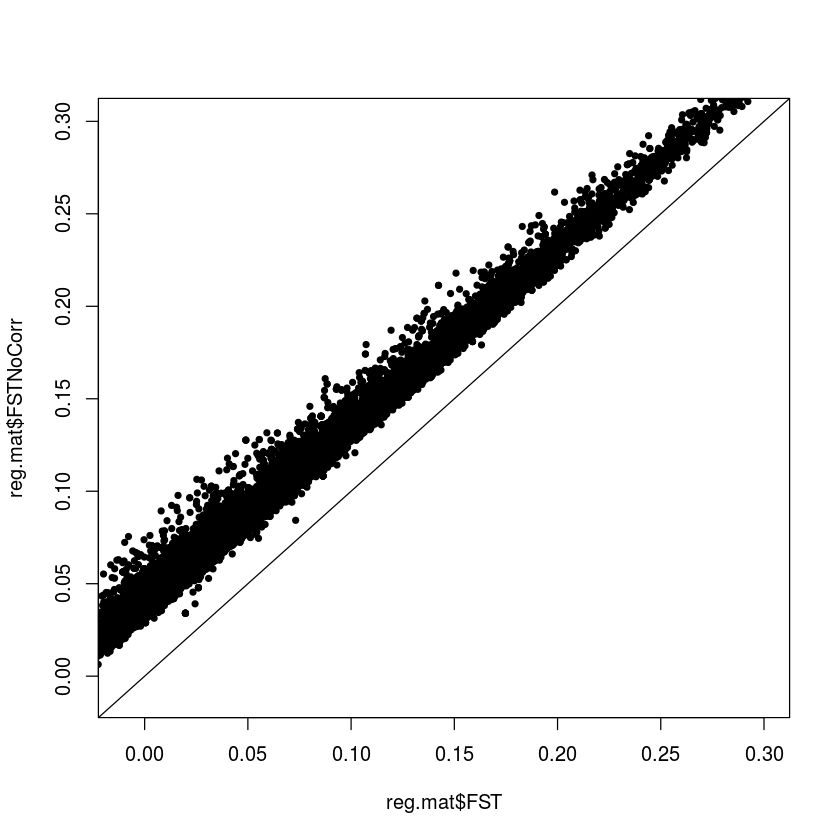

In [23]:
plot(reg.mat$FST, reg.mat$FSTNoCorr, xlim = c(-0.01,0.3), 
     ylim = c(-0.01, 0.3), pch = 20)
abline(0, 1)

In [24]:
reg.output <- OutFLANK(reg.mat,LeftTrimFraction=0.05,RightTrimFraction=0.05,Hmin=0.1,NumberOfSamples = nrow(unique(regions)) ,qthreshold=0.1)

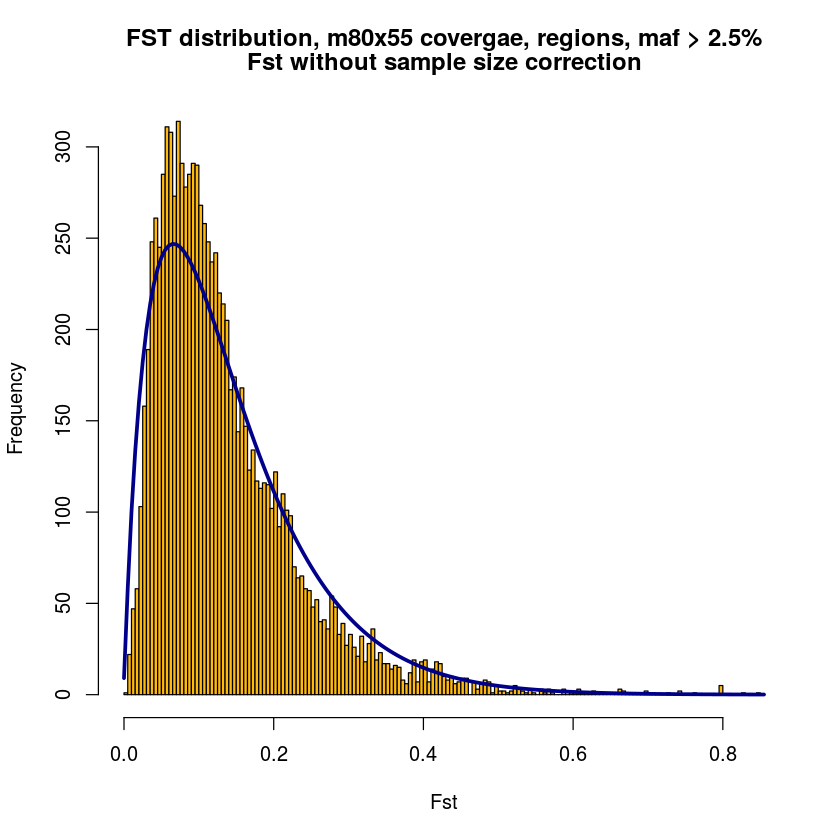

In [25]:
OutFLANKResultsPlotter(reg.output, withOutliers = TRUE,
NoCorr = TRUE, Hmin = 0.1, binwidth = 0.005, Zoom =
FALSE, RightZoomFraction = 0.05, titletext = "FST distribution, m80x55 covergae, regions, maf > 2.5%")

In [26]:
outliers_reg <- reg.output$results$LocusName[reg.output$results$OutlierFlag == TRUE]
print(outliers_reg)

factor(0)
13444 Levels: locus_100037__55__55.C ... locus_99985__67__67.A


# PCAdapt

In [21]:
library("ggplot2")
library("pcadapt")

Loading required package: robust
Loading required package: fit.models
Loading required package: MASS
Loading required package: vcfR

   *****       ***   vcfR   ***       *****
   This is vcfR 1.7.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [22]:
# PCAdapt requires a pcadapt_class object. You can convert a matrix to 
# pcadapt_class with the read.pcadapt() function.
x <- read.pcadapt(snp,"x45m75_maf025_filt",local.env = T,type="lfmm")

Reading file tmp.pcadapt...
Number of SNPs: 13444
Number of individuals: 117
Number of SNPs with minor allele frequency lower than 0.05 ignored: 3521
183675 out of 1572948 missing data ignored.


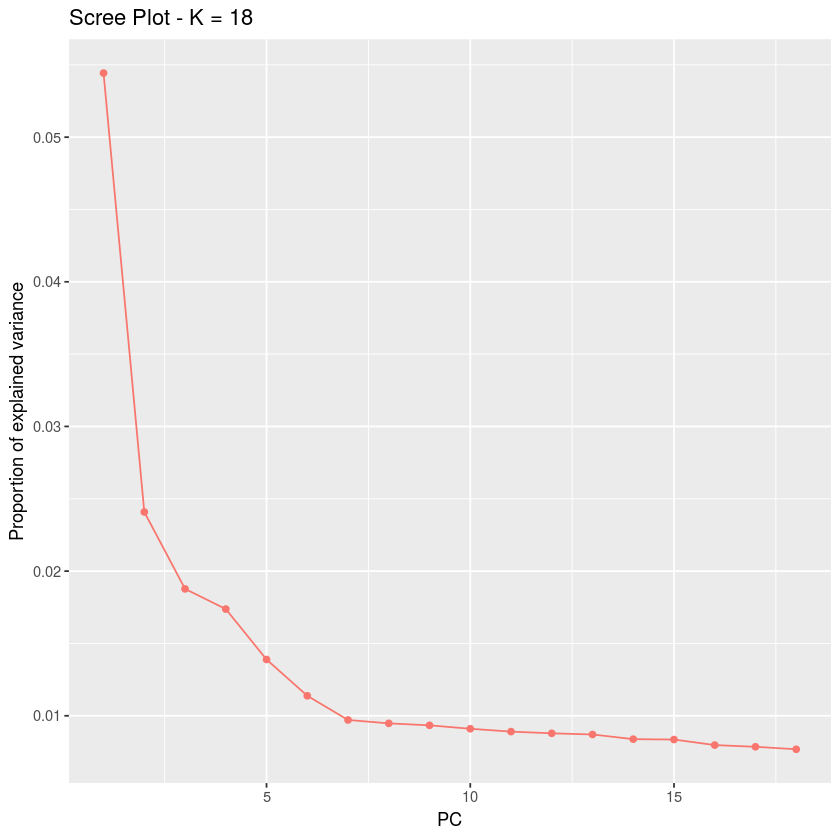

In [23]:
K <- 18
x <- pcadapt("tmp.pcadapt", K = K)
plot(x, option = "screeplot") # 6groups seems to be the correct value

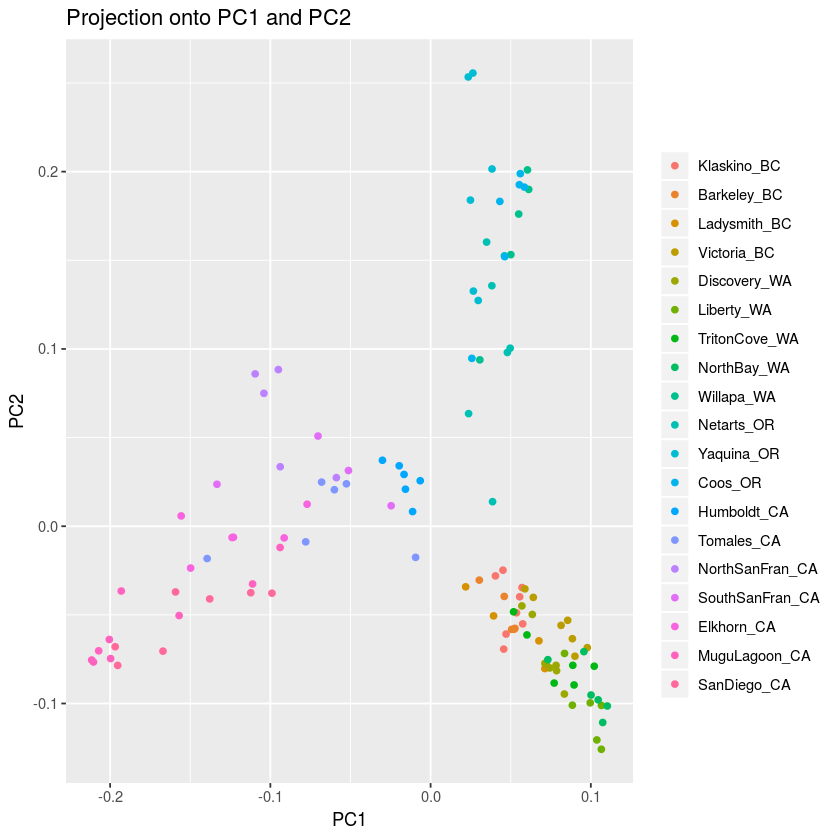

In [24]:
plot(x, option = "scores", pop= as.vector(pops[,1])) # how populations are shared among the 6 groups

In [25]:
K <- 6
x <- pcadapt("tmp.pcadapt", K = K, min.maf = 0.025)

summary(x)

Reading file tmp.pcadapt...
Number of SNPs: 13444
Number of individuals: 117
Number of SNPs with minor allele frequency lower than 0.025 ignored: 0
247754 out of 1572948 missing data ignored.


                Length Class  Mode   
maf             13444  -none- numeric
loadings        80664  -none- numeric
singular.values     6  -none- numeric
scores            702  -none- numeric
zscores         80664  -none- numeric
stat            13444  -none- numeric
gif                 1  -none- numeric
chi2.stat       13444  -none- numeric
pvalues         13444  -none- numeric

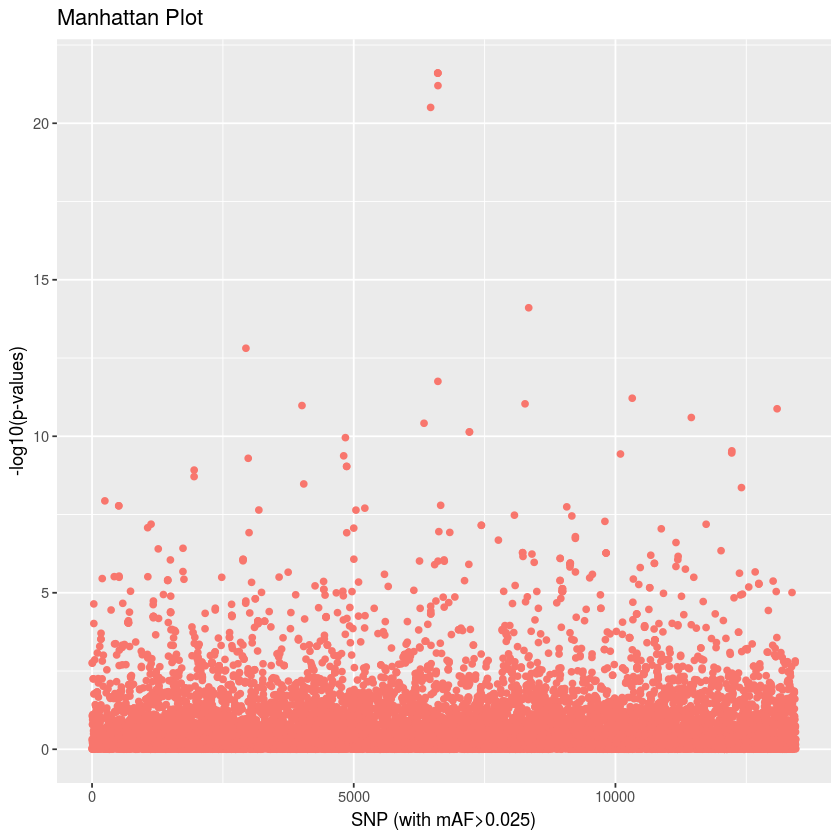

In [26]:
plot(x,option="manhattan")

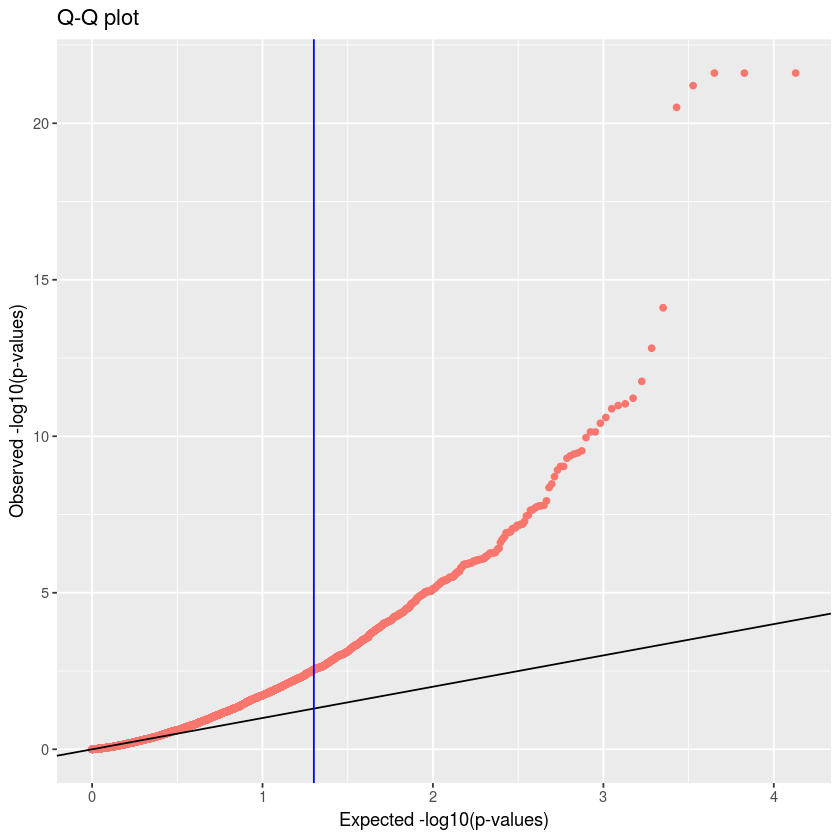

In [27]:
plot(x, option = "qqplot", threshold = 0.05)

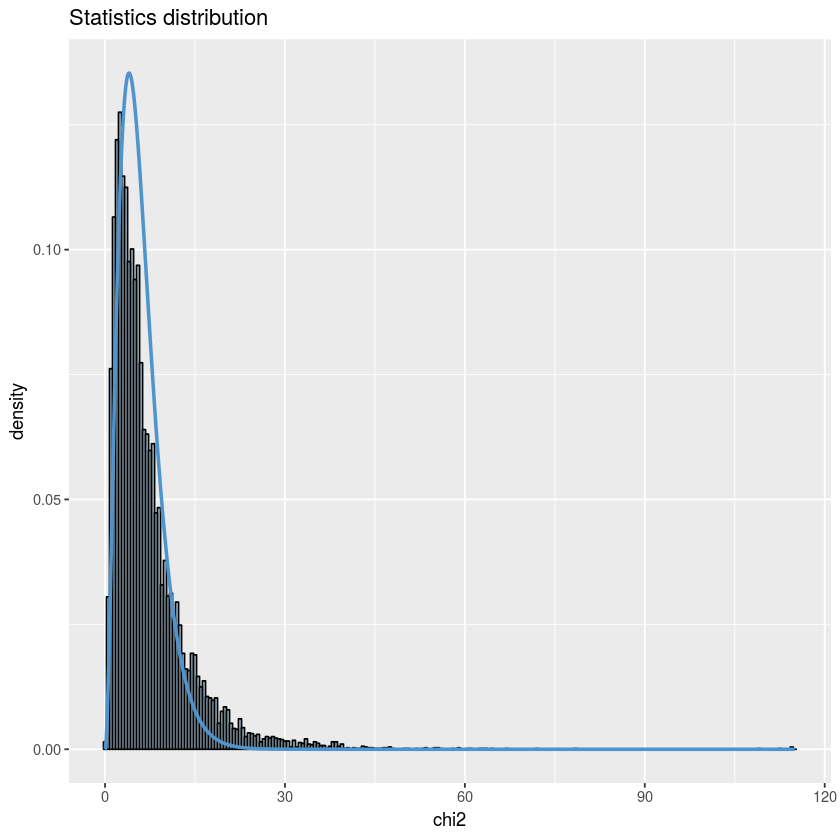

In [28]:
plot(x, option = "stat.distribution") # Distribution of Mahalanobis distances.

q-values

In [29]:
qval <- qvalue(x$pvalues)$qvalues
alpha <- 0.05
outliers_Q <- which(qval < alpha)
length(outliers_Q)

[1] 593

In [30]:
qval <- qvalue(x$pvalues)$qvalues
alpha <- 0.01
outliers_Q1 <- which(qval < alpha)
length(outliers_Q1)

[1] 320

In [37]:
snp_pc <- get.pc(x, outliers_Q)

In [31]:
outs_Q <- gsub('.{2}$', '', colnames(snp)[outliers_Q])
outs_Q1 <- gsub('.{2}$', '', colnames(snp)[outliers_Q1])


In [39]:
write.table(outs_Q,file = "x45m75maf025filt-pcadapt-q-snp.txt", quote = F,row.names = F,col.names = F)

In [32]:
loci_Q <- unique(unlist(strsplit(as.character(outs_Q),"_"))[seq(2,length(outs_Q)*6,6)])
length(loci_Q)

loci_Q1 <- unique(unlist(strsplit(as.character(outs_Q1),"_"))[seq(2,length(outs_Q1)*6,6)])
length(loci_Q1)


[1] 399

[1] 215

In [41]:
write.table(loci_Q,file = "x45m75maf025filt-pcadapt-q.loci", quote = F,row.names = F,col.names = F)

Benjamini-Hochberg Procedure

In [42]:
padj <- p.adjust(x$pvalues,method="BH")
alpha <- 0.05
outliers_BH <- which(padj < alpha)
length(outliers_BH)

[1] 593

Bonferroni correction

In [43]:
padj <- p.adjust(x$pvalues,method="bonferroni")
alpha <- 0.05
outliers_B <- which(padj < alpha)
length(outliers_B)

[1] 111

In [44]:
loci_B <- unique(unlist(strsplit(as.character(colnames(snp)[outliers_B]),"_"))[seq(2,length(outliers_B)*6,6)])
length(loci_B)

[1] 78

In [45]:
outs_B <- gsub('.{2}$', '', colnames(snp)[outliers_B])

In [46]:
write.table(loci_B,file = "x45m75maf025filt-pcadapt-B.loci", quote = F,row.names = F,col.names = F)

# Found in all analyses

In [33]:
#Loci Found in all three
write.table(intersect(intersect(loci_OF,loci_Q),loci_BS),file = "x45m75maf025filt-pcaQ_OF_BS-isect.loci", quote = F,row.names = F,col.names = F)
length(intersect(intersect(loci_OF,loci_Q),loci_BS))

[1] 15

In [50]:
intersect(intersect(loci_OF,loci_Q),loci_BS)

[1] "121492" "17359"  "17888"  "187013" "219420" "270303" "274413" "277490"
 [9] "280479" "285901" "290471" "292179" "333717" "335279" "50945"

In [58]:
#SNPs found in all 3
write.table(intersect(intersect(outliers_OF,outs_Q),outs_BS),file = "x45m75maf025filt-pcaQ_OF_BS-isect.snp", quote = F,row.names = F,col.names = F)
length(intersect(intersect(outliers_OF,outs_Q),outs_BS))


[1] 24

In [36]:
#Loci Found in at least 2
x <- unlist(list(loci_Q,loci_BS,loci_OF))
f <- table(x)
write.table(names(f)[f >= 2],file = "x45m75maf025filt-pcaQ_OF_BS-isect2.loci", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])
loci_2 <- names(f)[f >= 2]

[1] 97

In [37]:
head(loci_2)

[1] "101035" "104611" "104742" "104832" "10670"  "110252"

In [60]:
#SNPs found in at least 2
x <- unlist(list(outs_Q,outliers_OF,outs_BS))
f <- table(x)
write.table(names(f)[f >= 2],file = "x45m75maf025filt-pcaQ_OF_BS-isect2.snp", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])

[1] 129

In [61]:
#Union of all 3 loci

write.table(union(union(loci_OF,loci_Q),loci_BS),file = "x45m75maf025filt-pcaQ_OF_BS-union.loci", quote = F,row.names = F,col.names = F)
length(union(union(loci_OF,loci_Q),loci_BS))

[1] 498

In [34]:
#Union of all 3 SNPs
union_snp <- union(union(outliers_OF,outs_Q),outs_BS)
write.table(union(union(outliers_OF,outs_Q),outs_BS),file = "x45m75maf025filt-pcaQ_OF_BS-union.snp", quote = F,row.names = F,col.names = F)
length(union_snp)

[1] 767

In [63]:
#Found in pcadapt and outflank 
#SNP
length(intersect(outliers_OF,outs_Q))
#Loci
length(intersect(loci_OF,loci_Q))

[1] 24

[1] 15

In [53]:
x <- c("")


for(l in loci_2){
    x <- c(x,union_snp[grep(l,union_snp)])
}
x <- x[2:length(x)]
write.table(x,file = "x45m75maf025filt-pcaQ_OF_BS-isectUnion.snp", quote = F,row.names = F,col.names = F)
length(x)

[1] 168

In [67]:
#Found in Outflank and Bayescan
length(intersect(loci_OF,loci_BS))
length(intersect(outliers_OF,outs_BS))

[1] 16

[1] 31

In [68]:
#Found in Bayescan and pcadapt
length(intersect(loci_Q,loci_BS))
length(intersect(outs_Q,outs_BS))

[1] 96

[1] 122

# Plotting

In [ ]:
library("adegenet")
library("ggplot2")
library(dplyr)
library(reshape2)

load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-filt.genind")

gpop <- genind2genpop(stratted.filt)

latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

tab <- as.data.frame(cbind(gpop@tab,latitude))
dim(tab)

exclude <- c("10670__1","11905_42","11905_78","121492_34","121492_54","121492_56","121492_62","121492_88",
             "145020__9","153863__1","172232_14","17359_64","17359_76","17359_82","199935_57","200167_52",
             "200167_72","200167_54","215711_79","12991__9","144194_13","219420_31","219420_33","222051_62",
             "222051_68","23735_57","254657_13","254657_14","254657_15","254657_16",
             "254657_17","254657_18","254657_59","256727_35","268598_19","268598_55",
             "274413_57","274413_58","274413_74","277490_23","277490_41","277490_47",
             "277490_59","290471_14","290471_17","292179_27","292692__2","300901_80","300901__9",
             "318078_24","319929_40","324480_62","330617_67","335279_30","42995__7",
             "44811_27","4610_19","4610_68","46112_74","46112_83","5648_67","6721_63",
             "7299_33","7299_61","7299_83","274413_56","291771__3")

dim(tab)

tab <- as.data.frame(cbind(gpop@tab,latitude))
dim(tab)

for(i in seq(1,length(colnames(gpop@tab)),2)){
  locus = unlist(strsplit(colnames(gpop@tab)[i],"_"))[2]
  snp = substr(colnames(gpop@tab)[i],nchar(colnames(gpop@tab)[i])-4,nchar(colnames(gpop@tab)[i])-2)
  varname = paste0(locus,snp)
  snp_A = colnames(gpop@tab)[i]
  snp_B = colnames(gpop@tab)[i+1]
  tab[[varname]] <- tab[[snp_A]]/(tab[[snp_A]] +tab[[snp_B]])
  tab <- tab[ , !(names(tab) %in% c(snp_A,snp_B))]
}

regions <- c("NWBC","NWBC",rep("Puget+BC",6),"Willapa","Oregon","Oregon", "Willapa", rep("NoCal",4),rep("SoCal",3))
tab <- cbind(tab,regions)

tab <- tab[,!(colnames(tab) %in% exclude)]

pop <- rownames(tab)
tab <- cbind(tab,pop)
melted <- melt(tab,id.vars = c("pop","latitude","regions"))

ggplot(data=melted, aes(x=latitude, y=value, group=variable)) +
  geom_line() +geom_point(aes(x=latitude, y=value, color = regions)) +
  facet_wrap(~variable)